In [1]:
# Installazione e import
%pip -q install spacy

import spacy, sys, os, pandas as pd, matplotlib.pyplot as plt
from spacy import displacy

# Scarica e carica il modello (EN). Se vuoi italiano: "it_core_news_sm"
import spacy.cli
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

print("spaCy:", spacy.__version__)
print("Modello caricato:", nlp.meta["name"])


Note: you may need to restart the kernel to use updated packages.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
spaCy: 3.8.7
Modello caricato: core_web_sm


In [2]:
sample_path = "sample_text.txt"

# Leggi e stampa il testo
with open(sample_path, "r", encoding="utf-8") as f:
    text = f.read()

print("Path:", os.path.abspath(sample_path))
print(text)


Path: c:\Users\lory8\OneDrive\Desktop\UNIVPM\Data Science\Progetti\NLP 2\sample_text.txt
In October 2024, the Global Forum on Digital Civilization was held in Vienna, Austria, bringing together
policymakers, corporate leaders, researchers, activists, and journalists from more than 120 countries.
The event was organized jointly by the United Nations Educational, Scientific and Cultural Organization (UNESCO)
and the International Institute for Technology and Society (IITS), with financial support from the European
Commission and the Government of Canada.

Among the keynote speakers were Dr. Elena Marquez, a neuroscientist at Stanford University, and
Professor Ahmed Al-Khalidi, a historian from the University of Cairo, who presented a collaborative project titled
"Human Identity in the Age of Algorithmic Mediation." Their research argues that large-scale digital ecosystems
and AI-assisted decision structures are reshaping cultural memory, political identity, and even interpersonal
relatio

In [3]:
doc = nlp(text)

rows = []
for ent in doc.ents:
    rows.append({
        "ent_text": ent.text,
        "label": ent.label_,
        "start": ent.start_char,
        "end": ent.end_char,
        "sentence": ent.sent.text
    })

ents_df = pd.DataFrame(rows)
display(ents_df)


,ent_text,label,start,end,sentence
0,October 2024,DATE,3,15,"In October 2024, the Global Forum on Digital C..."
1,Digital Civilization,ORG,37,57,"In October 2024, the Global Forum on Digital C..."
2,Vienna,GPE,70,76,"In October 2024, the Global Forum on Digital C..."
3,Austria,GPE,78,85,"In October 2024, the Global Forum on Digital C..."
4,more than 120,CARDINAL,183,196,"In October 2024, the Global Forum on Digital C..."
5,"the United Nations Educational, Scientific and...",ORG,243,311,The event was organized jointly by the United ...
6,UNESCO,ORG,313,319,The event was organized jointly by the United ...
7,the International Institute for Technology and...,ORG,325,379,The event was organized jointly by the United ...
8,the European\nCommission,ORG,416,439,The event was organized jointly by the United ...
9,the Government of Canada,ORG,444,468,The event was organized jointly by the United ...


In [4]:
from spacy import displacy
from IPython.display import HTML

html = displacy.render(
    doc,
    style="ent",
    jupyter=False,   # <- questa riga risolve l'errore
    options={"compact": True, "bg": "#0e1117", "color": "white"}
)

HTML(html)


label
ORG            17
GPE            16
PERSON          6
DATE            5
NORP            2
WORK_OF_ART     2
FAC             2
TIME            1
LAW             1
CARDINAL        1
QUANTITY        1
Name: count, dtype: int64


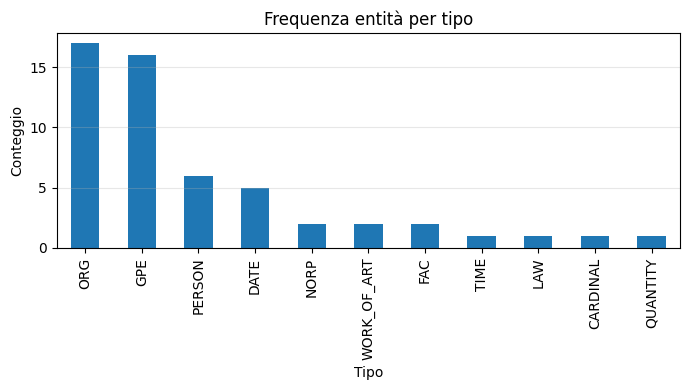

In [5]:
counts = ents_df["label"].value_counts().sort_values(ascending=False)
print(counts)

plt.figure(figsize=(7,4))
counts.plot(kind="bar")
plt.title("Frequenza entità per tipo")
plt.xlabel("Tipo"); plt.ylabel("Conteggio")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()
